In [1]:
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
# Fetching HSI data using yfinance
start_date = '2004-03-13'
end_date = '2024-03-14'
symbols = ['^HSI']
HSI_data = yf.download(symbols, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [3]:
#in order to show all the columns in one row
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 100)

# Reset index to move the Date from index to a column
HSI_data.reset_index(inplace=True)

# Check the modified dataframe
print(HSI_data.tail())

#check if any nan value to make sure the smoothness of aplying LTSM to predict the indice price
print(np.isnan(HSI_data).any())


           Date          Open          High           Low         Close     Adj Close      Volume
4925 2024-03-07  16417.769531  16512.410156  16136.120117  16229.780273  16229.780273  2535414300
4926 2024-03-08  16275.389648  16489.730469  16275.389648  16353.389648  16353.389648  2596313300
4927 2024-03-11  16416.169922  16625.640625  16416.169922  16587.570312  16587.570312  2494031000
4928 2024-03-12  16701.949219  17154.869141  16613.449219  17093.500000  17093.500000  4001753000
4929 2024-03-13  17059.109375  17214.669922  17050.869141  17082.109375  17082.109375  2801014000
Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool


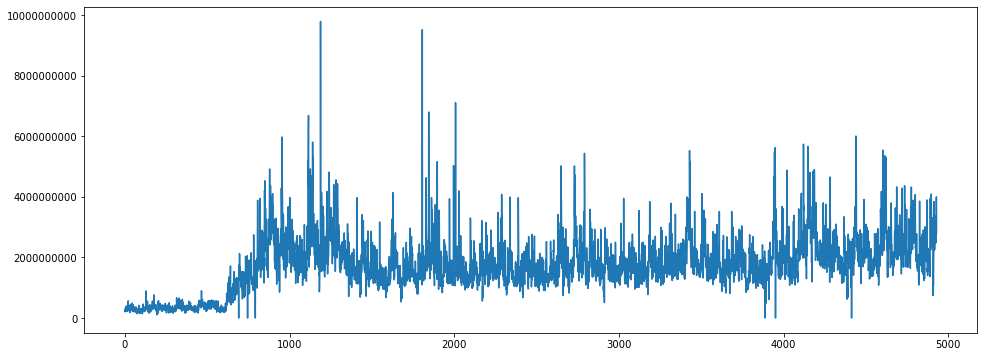

In [4]:
# Plotting
HSI_data['Volume'].plot(figsize=(16,6))

# Formatting y-axis ticks
plt.ticklabel_format(style='plain', axis='y')

plt.show()

In [5]:
# Create the model
model = RandomForestRegressor()

# Train the model
X = HSI_data[['Open', 'High', 'Low', 'Close']]  # Include all relevant columns
X = X.iloc[:-1]  # Exclude the last row for training
y = HSI_data['Volume'].iloc[:-1]  # Exclude the last row for training

model.fit(X, y)

RandomForestRegressor()

In [6]:
#test the model
predictions = model.predict(X)
print('The model score is:', model.score(X, y))

The model score is: 0.9174857840478404


In [7]:
# Make prediction
HSI_data_prediction = HSI_data[['Open', 'High', 'Low', 'Close']].tail(1)
prediction = int(model.predict(HSI_data_prediction)[0])  # Convert prediction to integer
print('The predicted last day trading volume is', prediction)

# Get the actual last day trading volume
actual_last_day_volume = int(HSI_data['Volume'].iloc[-1])  # Convert actual volume to integer
print('The actual last day trading volume is:', actual_last_day_volume)

The predicted last day trading volume is 682507102
The actual last day trading volume is: 2801014000
